# Usage: policy measures
Here, we will analyse the relationship of policy measures and parameter values of SIR-derived ODE models. Policy measures are tracked by [Oxford Covid-19 Government Response Tracker (OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker).

## Preparation

In [1]:
# Standard users
# !pip install covsirphy
# Developers (Note: this notebook is in example directory)
import os
os.chdir("../")

In [2]:
from pprint import pprint

In [3]:
import covsirphy as cs
cs.__version__

'2.14.0-delta'

In [4]:
# Standard users and developers
data_loader = cs.DataLoader("input")
# The number of cases (JHU style)
jhu_data = data_loader.jhu(verbose=False)
# Population in each country
population_data = data_loader.population(verbose=False)
# Government Response Tracker (OxCGRT)
oxcgrt_data = data_loader.oxcgrt(verbose=False)
# Description/citation
print(oxcgrt_data.citation)

(Secondary source) Guidotti, E., Ardia, D., (2020), "COVID-19 Data Hub", Journal of Open Source Software 5(51):2376, doi: 10.21105/joss.02376.


## Class for policy measure analysis
We will `PolicyMeasures` class to find relationship of policy measures and parameter values of SIR-derived ODE models.

In [5]:
# Create analyser with tau value 360 [min] (can be changed)
analyser = cs.PolicyMeasures(jhu_data, population_data, oxcgrt_data, tau=360)
# The number of registerd countries
len(analyser.countries)

196

In [6]:
# We can get Scenario instance for detailed scenario analysis
type(analyser.scenario("Japan"))

covsirphy.analysis.scenario.Scenario

## Set phases with S-R trend analysis
We will perform S-R trend analysis to set phases in all countries. Countries which do not have **17th phases** will be un-registered for the next analysis. This number will be adjusted for your analysis.

In [7]:
# Show the number of phases of all countries
analyser.trend()
pprint(analyser.phase_len(), compact=True)

{2: ['Saint Kitts and Nevis', 'Holy See', 'Laos'],
 3: ['Fiji', 'Timor-Leste'],
 4: ['Tanzania', 'Dominica'],
 5: ['Brunei', 'Saint Vincent and the Grenadines', 'Grenada'],
 6: ['Saint Lucia', 'Equatorial Guinea'],
 7: ['Sao Tome and Principe', 'Mauritius', 'Northern Mariana Islands',
     'Antigua and Barbuda'],
 8: ['Kyrgyzstan', 'Madagascar', 'Cambodia', 'Liechtenstein', 'Bahamas'],
 9: ['Philippines', 'Uzbekistan', 'Botswana', 'Seychelles', 'Guam', 'Gambia',
     'Republic of the Congo', 'Vietnam', 'Australia', 'Jamaica',
     'Trinidad and Tobago'],
 10: ['Kazakhstan', 'Djibouti', 'Cape Verde', 'Kenya', 'India', 'Bhutan',
      'Guatemala', 'Singapore', 'Bahrain', 'Ghana', 'Maldives', 'Honduras',
      'Suriname', 'Oman', 'Zimbabwe', 'Belize', 'Rwanda',
      'Virgin Islands, U.S.', 'Bolivia', 'Benin', 'Monaco', 'Ethiopia',
      'Taiwan', 'Angola', 'Libya', 'Venezuela', 'Guyana', 'Papua New Guinea',
      'Zambia', 'Iceland', 'Iraq'],
 11: ['Kuwait', 'Colombia', 'Argentina', 'Isr

In [8]:
# Set phases with S-R trend analysis
analyser.trend(min_len=17)
# The number of countries
len(analyser.countries)

11

In [9]:
phase_len_dict = analyser.phase_len()
pprint(phase_len_dict, compact=True)

{17: ['Romania', 'Belgium', 'Italy', 'Finland', 'Canada', 'Switzerland'],
 18: ['Portugal', 'United Kingdom', 'Norway', 'Netherlands'],
 19: ['Germany']}


In [10]:
# Here, only show the countries which have the most phases
countries_show = max(phase_len_dict.items(), key=lambda x: x[0])[1]
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population
Country Phase                                        
Germany 0th    Past  18Jan2020  22Mar2020    82905782
        1st    Past  23Mar2020  02Apr2020    82905782
        2nd    Past  03Apr2020  20Apr2020    82905782
        3rd    Past  21Apr2020  16Jun2020    82905782
        4th    Past  17Jun2020  15Aug2020    82905782
        5th    Past  16Aug2020  16Sep2020    82905782
        6th    Past  17Sep2020  08Oct2020    82905782
        7th    Past  09Oct2020  20Oct2020    82905782
        8th    Past  21Oct2020  27Oct2020    82905782
        9th    Past  28Oct2020  03Nov2020    82905782
        10th   Past  04Nov2020  10Nov2020    82905782
        11th   Past  11Nov2020  17Nov2020    82905782
        12th   Past  18Nov2020  24Nov2020    82905782
        13th   Past  25Nov2020  01Dec2020    82905782
        14th   Past  02Dec2020  08Dec2020    82905782
        15th   Past  09Dec2020  15Dec2020    82905782
        16th   Past  16Dec2020  21Dec2020    82905782
        17th   Past  22Dec2020  28Dec2020    82905782
        18th   Past  29Dec2020  05Jan2021    82905782

## Parameter estimation
we will estimate the parameter values with SIR-derived ODE models in each country.

In [11]:
# Parameter estimation with SIR-F model
analyser.estimate(cs.SIRF, timeout=10)


<SIR-F model: parameter estimation>
Running optimization with 4 CPUs...


	DEU,  4th phase (17Jun2020 - 15Aug2020): finished  272 trials in 0 min 10 sec

	BEL, 11th phase (01Nov2020 - 07Nov2020): finished  266 trials in 0 min 10 sec

	ROU, 14th phase (09Dec2020 - 15Dec2020): finished  274 trials in 0 min 10 sec

	CAN,  4th phase (20Jul2020 - 06Sep2020): finished  230 trials in 0 min 10 sec

	CHE,  1st phase (22Mar2020 - 30Mar2020): finished  263 trials in 0 min 10 sec

	FIN,  1st phase (05Apr2020 - 19Apr2020): finished  243 trials in 0 min 10 sec

	ITA,  8th phase (23Oct2020 - 01Nov2020): finished  266 trials in 0 min 10 sec

	BEL,  6th phase (29Sep2020 - 07Oct2020): finished  250 trials in 0 min 10 sec

	NLD,  0th phase (16Mar2020 - 07Apr2020): finished  226 trials in 0 min 10 sec

	ROU,  8th phase (29Oct2020 - 04Nov2020): finished  229 trials in 0 min 10 sec

	ROU, 13th phase (03Dec2020 - 08Dec2020): finished  227 trials in 0 min 10 sec

	NOR,  3rd phase (03May2020 - 05Aug2020): finished  197 trials in 0 min 10 sec

	ITA,  9th phase (02Nov2020 - 11Nov2020): finished  212 trials in 0 min 10 sec

	NOR,  0th phase (10Mar2020 - 25Mar2020): finished  209 trials in 0 min 10 sec

	FIN,  3rd phase (05May2020 - 26May2020): finished  217 trials in 0 min 10 sec

	BEL, 14th phase (26Nov2020 - 07Dec2020): finished  218 trials in 0 min 10 sec

	ITA,  1st phase (20Mar2020 - 31Mar2020): finished  267 trials in 0 min 10 sec

	PRT, 10th phase (05Nov2020 - 14Nov2020): finished  249 trials in 0 min 10 sec

	NOR,  4th phase (06Aug2020 - 02Sep2020): finished  250 trials in 0 min 10 sec

	NLD,  9th phase (30Oct2020 - 04Nov2020): finished  264 trials in 0 min 10 sec

	FIN, 16th phase (27Dec2020 - 05Jan2021): finished  246 trials in 0 min 10 sec

	PRT,  3rd phase (06Jun2020 - 09Jul2020): finished  267 trials in 0 min 10 sec

	ITA,  7th phase (16Oct2020 - 22Oct2020): finished  272 trials in 0 min 10 sec

	BEL,  9th phase (20Oct2020 - 25Oct2020): finished  261 trials in 0 min 10 sec

	CHE,  3rd phase (15Apr2020 - 22Jul2020): finished  231 trials in 0 min 10 sec

	CAN,  9th phase (05Nov2020 - 13Nov2020): finished  244 trials in 0 min 10 sec

	DEU,  1st phase (23Mar2020 - 02Apr2020): finished  248 trials in 0 min 10 sec

	BEL,  8th phase (14Oct2020 - 19Oct2020): finished  244 trials in 0 min 10 sec

	GBR,  0th phase (23Feb2020 - 09Apr2020): finished  244 trials in 0 min 10 sec

	GBR,  4th phase (08Aug2020 - 16Sep2020): finished  258 trials in 0 min 10 sec

	NLD,  2nd phase (02May2020 - 10Aug2020): finished  247 trials in 0 min 10 sec

	NLD, 13th phase (28Nov2020 - 05Dec2020): finished  257 trials in 0 min 10 sec

	FIN,  8th phase (19Oct2020 - 28Oct2020): finished  241 trials in 0 min 10 sec

	BEL, 10th phase (26Oct2020 - 31Oct2020): finished  255 trials in 0 min 10 sec

	FIN,  9th phase (29Oct2020 - 08Nov2020): finished  252 trials in 0 min 10 sec

	NLD, 12th phase (20Nov2020 - 27Nov2020): finished  242 trials in 0 min 10 sec

	NLD, 14th phase (06Dec2020 - 11Dec2020): finished  266 trials in 0 min 10 sec

	ITA,  6th phase (02Oct2020 - 15Oct2020): finished  278 trials in 0 min 10 sec

	FIN,  2nd phase (20Apr2020 - 04May2020): finished  270 trials in 0 min 10 sec

	DEU,  2nd phase (03Apr2020 - 20Apr2020): finished  268 trials in 0 min 10 sec

	NLD,  8th phase (20Oct2020 - 29Oct2020): finished  304 trials in 0 min 10 sec

	NLD,  5th phase (28Sep2020 - 06Oct2020): finished  295 trials in 0 min 10 sec

	GBR,  9th phase (28Oct2020 - 03Nov2020): finished  303 trials in 0 min 10 sec

	NOR, 11th phase (10Nov2020 - 22Nov2020): finished  288 trials in 0 min 10 sec

	GBR,  6th phase (03Oct2020 - 12Oct2020): finished  255 trials in 0 min 10 sec

	GBR, 10th phase (04Nov2020 - 10Nov2020): finished  279 trials in 0 min 10 sec

	BEL, 12th phase (08Nov2020 - 15Nov2020): finished  277 trials in 0 min 10 sec

	CAN, 15th phase (20Dec2020 - 27Dec2020): finished  282 trials in 0 min 10 sec

	PRT,  0th phase (14Mar2020 - 03Apr2020): finished  325 trials in 0 min 10 sec

	BEL, 15th phase (08Dec2020 - 19Dec2020): finished  341 trials in 0 min 10 sec

	CAN, 12th phase (29Nov2020 - 05Dec2020): finished  338 trials in 0 min 10 sec

	PRT,  6th phase (25Sep2020 - 12Oct2020): finished  319 trials in 0 min 10 sec

	ROU,  5th phase (24Sep2020 - 08Oct2020): finished  357 trials in 0 min 10 sec

	GBR,  1st phase (10Apr2020 - 30Apr2020): finished  365 trials in 0 min 10 sec

	DEU,  3rd phase (21Apr2020 - 16Jun2020): finished  350 trials in 0 min 10 sec

	CHE, 12th phase (15Nov2020 - 24Nov2020): finished  369 trials in 0 min 10 sec

	FIN,  7th phase (08Oct2020 - 18Oct2020): finished  331 trials in 0 min 10 sec

	BEL, 13th phase (16Nov2020 - 25Nov2020): finished  342 trials in 0 min 10 sec

	FIN,  0th phase (17Mar2020 - 04Apr2020): finished  340 trials in 0 min 10 sec

	ROU,  4th phase (02Sep2020 - 23Sep2020): finished  340 trials in 0 min 10 sec

	ITA,  4th phase (11May2020 - 28Aug2020): finished  335 trials in 0 min 10 sec

	NOR,  8th phase (21Oct2020 - 28Oct2020): finished  371 trials in 0 min 10 sec

	NOR,  5th phase (03Sep2020 - 19Sep2020): finished  365 trials in 0 min 10 sec

	ROU, 12th phase (25Nov2020 - 02Dec2020): finished  367 trials in 0 min 10 sec

	ITA,  0th phase (24Feb2020 - 19Mar2020): finished  343 trials in 0 min 10 sec

	DEU, 16th phase (16Dec2020 - 21Dec2020): finished  351 trials in 0 min 10 sec

	CHE,  0th phase (03Mar2020 - 21Mar2020): finished  342 trials in 0 min 10 sec

	PRT, 15th phase (16Dec2020 - 22Dec2020): finished  337 trials in 0 min 10 sec

	PRT, 14th phase (10Dec2020 - 15Dec2020): finished  350 trials in 0 min 10 sec

	ROU,  3rd phase (10Aug2020 - 01Sep2020): finished  343 trials in 0 min 10 sec

	CHE,  4th phase (23Jul2020 - 24Aug2020): finished  338 trials in 0 min 10 sec

	FIN, 11th phase (19Nov2020 - 25Nov2020): finished  352 trials in 0 min 10 sec

	ROU,  7th phase (20Oct2020 - 28Oct2020): finished  366 trials in 0 min 10 sec

	NOR, 15th phase (15Dec2020 - 21Dec2020): finished  367 trials in 0 min 10 sec

	BEL,  3rd phase (10May2020 - 03Aug2020): finished  339 trials in 0 min 10 sec

	CHE, 13th phase (25Nov2020 - 30Nov2020): finished  366 trials in 0 min 10 sec

	FIN, 15th phase (17Dec2020 - 26Dec2020): finished  353 trials in 0 min 10 sec

	BEL,  1st phase (30Mar2020 - 13Apr2020): finished  359 trials in 0 min 10 sec

	NOR, 14th phase (08Dec2020 - 14Dec2020): finished  363 trials in 0 min 10 sec

	ITA,  5th phase (29Aug2020 - 01Oct2020): finished  350 trials in 0 min 10 sec

	CAN, 13th phase (06Dec2020 - 12Dec2020): finished  366 trials in 0 min 10 sec

	BEL,  4th phase (04Aug2020 - 12Sep2020): finished  350 trials in 0 min 10 sec

	FIN, 10th phase (09Nov2020 - 18Nov2020): finished  364 trials in 0 min 10 sec

	CAN,  7th phase (12Oct2020 - 24Oct2020): finished  365 trials in 0 min 10 sec

	GBR,  7th phase (13Oct2020 - 20Oct2020): finished  327 trials in 0 min 10 sec

	BEL,  0th phase (04Mar2020 - 29Mar2020): finished  317 trials in 0 min 10 sec

	NLD,  4th phase (14Sep2020 - 27Sep2020): finished  306 trials in 0 min 10 sec

	GBR,  5th phase (17Sep2020 - 02Oct2020): finished  305 trials in 0 min 10 sec

	CAN, 10th phase (14Nov2020 - 21Nov2020): finished  346 trials in 0 min 10 sec

	ROU,  6th phase (09Oct2020 - 19Oct2020): finished  354 trials in 0 min 10 sec

	CHE, 10th phase (30Oct2020 - 08Nov2020): finished  352 trials in 0 min 10 sec

	PRT,  5th phase (01Sep2020 - 24Sep2020): finished  336 trials in 0 min 10 sec

	CAN,  5th phase (07Sep2020 - 28Sep2020): finished  308 trials in 0 min 10 sec

	DEU, 13th phase (25Nov2020 - 01Dec2020): finished  302 trials in 0 min 10 sec

	ITA, 11th phase (22Nov2020 - 02Dec2020): finished  303 trials in 0 min 10 sec

	FIN, 12th phase (26Nov2020 - 01Dec2020): finished  292 trials in 0 min 10 sec

	ROU,  2nd phase (17Jul2020 - 09Aug2020): finished  286 trials in 0 min 10 sec

	NOR, 17th phase (29Dec2020 - 05Jan2021): finished  306 trials in 0 min 10 sec

	CAN, 14th phase (13Dec2020 - 19Dec2020): finished  302 trials in 0 min 10 sec

	CHE,  7th phase (06Oct2020 - 13Oct2020): finished  315 trials in 0 min 10 sec

	ROU,  1st phase (07May2020 - 16Jul2020): finished  300 trials in 0 min 10 sec

	NOR,  9th phase (29Oct2020 - 03Nov2020): finished  329 trials in 0 min 10 sec

	NLD, 16th phase (18Dec2020 - 28Dec2020): finished  330 trials in 0 min 10 sec

	NLD,  6th phase (07Oct2020 - 13Oct2020): finished  320 trials in 0 min 10 sec

	GBR, 11th phase (11Nov2020 - 17Nov2020): finished  353 trials in 0 min 10 sec

	CHE,  5th phase (25Aug2020 - 14Sep2020): finished  354 trials in 0 min 10 sec

	CHE, 15th phase (11Dec2020 - 20Dec2020): finished  366 trials in 0 min 10 sec

	ITA,  3rd phase (17Apr2020 - 10May2020): finished  359 trials in 0 min 10 sec

	FIN,  5th phase (21Aug2020 - 22Sep2020): finished  248 trials in 0 min 10 sec

	ROU,  0th phase (04Mar2020 - 06May2020): finished  229 trials in 0 min 10 sec

	FIN, 14th phase (09Dec2020 - 16Dec2020): finished  230 trials in 0 min 10 sec

	DEU,  7th phase (09Oct2020 - 20Oct2020): finished  224 trials in 0 min 10 sec

	PRT,  7th phase (13Oct2020 - 21Oct2020): finished  218 trials in 0 min 10 sec

	ITA, 10th phase (12Nov2020 - 21Nov2020): finished  223 trials in 0 min 10 sec

	NOR,  2nd phase (06Apr2020 - 02May2020): finished  210 trials in 0 min 10 sec

	GBR,  3rd phase (28May2020 - 07Aug2020): finished  207 trials in 0 min 10 sec

	NOR,  1st phase (26Mar2020 - 05Apr2020): finished  227 trials in 0 min 10 sec

	CHE,  2nd phase (31Mar2020 - 14Apr2020): finished  222 trials in 0 min 10 sec

	ROU,  9th phase (05Nov2020 - 11Nov2020): finished  220 trials in 0 min 10 sec

	CHE, 14th phase (01Dec2020 - 10Dec2020): finished  223 trials in 0 min 10 sec

	FIN,  4th phase (27May2020 - 20Aug2020): finished  212 trials in 0 min 10 sec

	PRT,  2nd phase (24Apr2020 - 05Jun2020): finished  232 trials in 0 min 10 sec

	CHE, 16th phase (21Dec2020 - 05Jan2021): finished  232 trials in 0 min 10 sec

	NOR,  6th phase (20Sep2020 - 05Oct2020): finished  254 trials in 0 min 10 sec

	ROU, 16th phase (24Dec2020 - 05Jan2021): finished  281 trials in 0 min 10 sec

	PRT, 12th phase (26Nov2020 - 02Dec2020): finished  289 trials in 0 min 10 sec

	CAN, 16th phase (28Dec2020 - 05Jan2021): finished  276 trials in 0 min 10 sec

	PRT,  8th phase (22Oct2020 - 28Oct2020): finished  302 trials in 0 min 10 sec

	CAN,  0th phase (27Feb2020 - 11Apr2020): finished  249 trials in 0 min 10 sec

	NOR, 16th phase (22Dec2020 - 28Dec2020): finished  268 trials in 0 min 10 sec

	CAN,  3rd phase (26May2020 - 19Jul2020): finished  246 trials in 0 min 10 sec

	CAN,  1st phase (12Apr2020 - 01May2020): finished  240 trials in 0 min 10 sec

	ROU, 15th phase (16Dec2020 - 23Dec2020): finished  257 trials in 0 min 10 sec

	PRT, 11th phase (15Nov2020 - 25Nov2020): finished  261 trials in 0 min 10 sec

	PRT, 13th phase (03Dec2020 - 09Dec2020): finished  260 trials in 0 min 10 sec

	CHE,  6th phase (15Sep2020 - 05Oct2020): finished  254 trials in 0 min 10 sec

	CAN,  6th phase (29Sep2020 - 11Oct2020): finished  267 trials in 0 min 10 sec

	BEL,  2nd phase (14Apr2020 - 09May2020): finished  274 trials in 0 min 10 sec

	ROU, 10th phase (12Nov2020 - 17Nov2020): finished  283 trials in 0 min 10 sec

	NOR, 10th phase (04Nov2020 - 09Nov2020): finished  292 trials in 0 min 10 sec

	BEL,  5th phase (13Sep2020 - 28Sep2020): finished  282 trials in 0 min 10 sec

	NLD, 15th phase (12Dec2020 - 17Dec2020): finished  282 trials in 0 min 10 sec

	NOR, 13th phase (30Nov2020 - 07Dec2020): finished  286 trials in 0 min 10 sec

	GBR,  8th phase (21Oct2020 - 27Oct2020): finished  266 trials in 0 min 10 sec

	FIN,  6th phase (23Sep2020 - 07Oct2020): finished  251 trials in 0 min 10 sec

	GBR, 17th phase (26Dec2020 - 05Jan2021): finished  247 trials in 0 min 10 sec

	NLD,  3rd phase (11Aug2020 - 13Sep2020): finished  228 trials in 0 min 10 sec

	ITA,  2nd phase (01Apr2020 - 16Apr2020): finished  232 trials in 0 min 10 sec

	NOR,  7th phase (06Oct2020 - 20Oct2020): finished  298 trials in 0 min 10 sec

	CAN,  8th phase (25Oct2020 - 04Nov2020): finished  304 trials in 0 min 10 sec

	PRT,  1st phase (04Apr2020 - 23Apr2020): finished  277 trials in 0 min 10 sec

	CHE, 11th phase (09Nov2020 - 14Nov2020): finished  323 trials in 0 min 10 sec

	ROU, 11th phase (18Nov2020 - 24Nov2020): finished  309 trials in 0 min 10 sec

	CAN,  2nd phase (02May2020 - 25May2020): finished  298 trials in 0 min 10 sec

	PRT, 17th phase (30Dec2020 - 05Jan2021): finished  289 trials in 0 min 10 sec

	GBR,  2nd phase (01May2020 - 27May2020): finished  288 trials in 0 min 10 sec

	NOR, 12th phase (23Nov2020 - 29Nov2020): finished  297 trials in 0 min 10 sec

	NLD,  1st phase (08Apr2020 - 01May2020): finished  327 trials in 0 min 10 sec

	GBR, 16th phase (16Dec2020 - 25Dec2020): finished  336 trials in 0 min 10 sec

	DEU,  0th phase (18Jan2020 - 22Mar2020): finished  323 trials in 0 min 10 sec

	CAN, 11th phase (22Nov2020 - 28Nov2020): finished  272 trials in 0 min 10 sec

	NLD, 11th phase (12Nov2020 - 19Nov2020): finished  270 trials in 0 min 10 sec

	PRT,  4th phase (10Jul2020 - 31Aug2020): finished  260 trials in 0 min 10 sec

	PRT, 16th phase (23Dec2020 - 29Dec2020): finished  265 trials in 0 min 10 sec

	DEU,  5th phase (16Aug2020 - 16Sep2020): finished  257 trials in 0 min 10 sec

	BEL,  7th phase (08Oct2020 - 13Oct2020): finished  254 trials in 0 min 10 sec

	BEL, 16th phase (20Dec2020 - 05Jan2021): finished  307 trials in 0 min 10 sec

	FIN, 13th phase (02Dec2020 - 08Dec2020): finished  312 trials in 0 min 10 sec

	DEU,  6th phase (17Sep2020 - 08Oct2020): finished  301 trials in 0 min 10 sec

Completed optimization. Total: 7 min 52 sec


In [12]:
# Show summary
analyser.summary(countries=countries_show)

Type      Start        End  Population    ODE     Rt  \
Country Phase                                                         
Germany 0th    Past  18Jan2020  22Mar2020    82905782  SIR-F  17.14   
        1st    Past  23Mar2020  02Apr2020    82905782  SIR-F   7.24   
        2nd    Past  03Apr2020  20Apr2020    82905782  SIR-F    0.6   
        3rd    Past  21Apr2020  16Jun2020    82905782  SIR-F   0.51   
        4th    Past  17Jun2020  15Aug2020    82905782  SIR-F   1.19   
        5th    Past  16Aug2020  16Sep2020    82905782  SIR-F   1.31   
        6th    Past  17Sep2020  08Oct2020    82905782  SIR-F   1.32   
        7th    Past  09Oct2020  20Oct2020    82905782  SIR-F   3.13   
        8th    Past  21Oct2020  27Oct2020    82905782      -      -   
        9th    Past  28Oct2020  03Nov2020    82905782      -      -   
        10th   Past  04Nov2020  10Nov2020    82905782      -      -   
        11th   Past  11Nov2020  17Nov2020    82905782      -      -   
        12th   Past  18Nov2020  24Nov2020    82905782      -      -   
        13th   Past  25Nov2020  01Dec2020    82905782  SIR-F   0.91   
        14th   Past  02Dec2020  08Dec2020    82905782      -      -   
        15th   Past  09Dec2020  15Dec2020    82905782      -      -   
        16th   Past  16Dec2020  21Dec2020    82905782  SIR-F   1.13   
        17th   Past  22Dec2020  28Dec2020    82905782      -      -   
        18th   Past  29Dec2020  05Jan2021    82905782      -      -   

                     theta        kappa        rho       sigma  tau  \
Country Phase                                                         
Germany 0th     0.00234372  9.82318e-05  0.0168964  0.00088511  360   
        1st         0.0197  0.000753584  0.0279618  0.00303066  360   
        2nd        0.03889  0.000481933  0.0122493   0.0191979  360   
        3rd      0.0349266  6.96983e-05  0.0115059   0.0218809  360   
        4th     0.00329531   5.9472e-05  0.0170967   0.0142304  360   
        5th     0.00156721  0.000191478  0.0163103   0.0122371  360   
        6th    0.000501427  9.63532e-05  0.0183873   0.0138017  360   
        7th    0.000676492  6.74045e-05  0.0257689   0.0081607  360   
        8th              -            -          -           -    -   
        9th              -            -          -           -    -   
        10th             -            -          -           -    -   
        11th             -            -          -           -    -   
        12th             -            -          -           -    -   
        13th     0.0159733  0.000287581  0.0146726   0.0156356  360   
        14th             -            -          -           -    -   
        15th             -            -          -           -    -   
        16th   0.000182781  0.000228665  0.0170442   0.0148243  360   
        17th             -            -          -           -    -   
        18th             -            -          -           -    -   

              1/gamma [day] 1/beta [day] alpha1 [-] 1/alpha2 [day]      RMSLE  \
Country Phase                                                                   
Germany 0th             282           14      0.002           2545    1.58118   
        1st              82            8       0.02            331   0.154551   
        2nd              13           20      0.039            518   0.149001   
        3rd              11           21      0.035           3586   0.081364   
        4th              17           14      0.003           4203   0.112908   
        5th              20           15      0.002           1305  0.0643981   
        6th              18           13      0.001           2594  0.0290678   
        7th              30            9      0.001           3708  0.0650377   
        8th               -            -          -              -          -   
        9th               -            -          -              -          -   
        10th              -            -          -        

## Compare the history of parameters
Here, compare the history of parameter values if countries.

In [13]:
# All parameter/day parameter/Rt/OxCGRT
analyser.track().head()

,Date,Country,theta,kappa,rho,sigma,alpha1 [-],1/alpha2 [day],1/beta [day],1/gamma [day],...,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
0,2020-03-04,Romania,0.0765361,0.000530831,0.0344765,0.00412027,0.077,470,7,60,...,0,0,0,0,0,2,2,0,0,16.67
1,2020-03-05,Romania,0.0765361,0.000530831,0.0344765,0.00412027,0.077,470,7,60,...,0,0,0,0,0,2,2,0,0,16.67
2,2020-03-06,Romania,0.0765361,0.000530831,0.0344765,0.00412027,0.077,470,7,60,...,0,0,0,0,0,2,2,0,0,16.67
3,2020-03-07,Romania,0.0765361,0.000530831,0.0344765,0.00412027,0.077,470,7,60,...,0,0,0,0,0,2,2,0,0,16.67
4,2020-03-08,Romania,0.0765361,0.000530831,0.0344765,0.00412027,0.077,470,7,60,...,2,1,0,0,0,2,2,0,0,30.56


### $Rt$: Reprodcution number $\mathrm{[-]}$

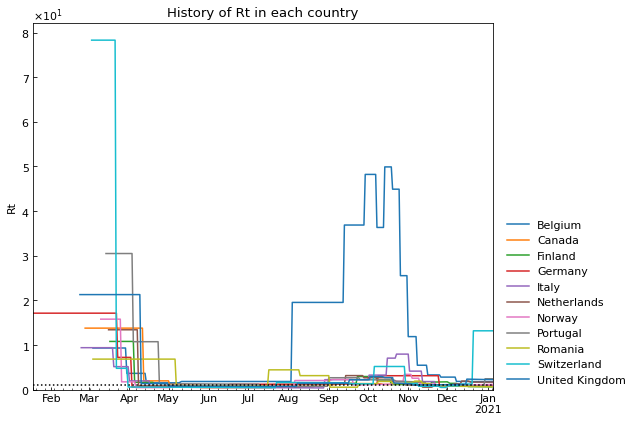

Country,Belgium,Canada,Finland,Germany,Italy,Netherlands,Norway,Portugal,Romania,Switzerland,United Kingdom
Date,,,,,,,,,,,
2021-01-01,1.77,0.94,0.64,1.13,0.8,1.7,1.18,2.45,0.66,13.19,2.24
2021-01-02,1.77,0.94,0.64,1.13,0.8,1.7,1.18,2.45,0.66,13.19,2.24
2021-01-03,1.77,0.94,0.64,1.13,0.8,1.7,1.18,2.45,0.66,13.19,2.24
2021-01-04,1.77,0.94,0.64,1.13,0.8,1.7,1.18,2.45,0.66,13.19,2.24
2021-01-05,1.77,0.94,0.64,1.13,0.8,1.7,1.18,2.45,0.66,13.19,2.24


In [14]:
analyser.history("Rt", roll_window=None).tail()

### $\rho$: Effective contact rate $\mathrm{[-]}$

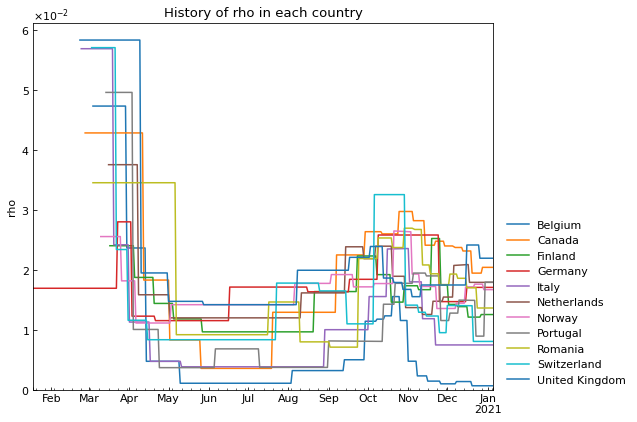

Country,Belgium,Canada,Finland,Germany,Italy,Netherlands,Norway,Portugal,Romania,Switzerland,United Kingdom
Date,,,,,,,,,,,
2021-01-01,0.000653,0.02038,0.012519,0.017044,0.007456,0.017882,0.016668,0.017916,0.01361,0.008042,0.021901
2021-01-02,0.000653,0.02038,0.012519,0.017044,0.007456,0.017882,0.016668,0.017916,0.01361,0.008042,0.021901
2021-01-03,0.000653,0.02038,0.012519,0.017044,0.007456,0.017882,0.016668,0.017916,0.01361,0.008042,0.021901
2021-01-04,0.000653,0.02038,0.012519,0.017044,0.007456,0.017882,0.016668,0.017916,0.01361,0.008042,0.021901
2021-01-05,0.000653,0.02038,0.012519,0.017044,0.007456,0.017882,0.016668,0.017916,0.01361,0.008042,0.021901


In [15]:
analyser.history("rho", roll_window=None).tail()

### $\sigma$: Recovery rate $\mathrm{[-]}$

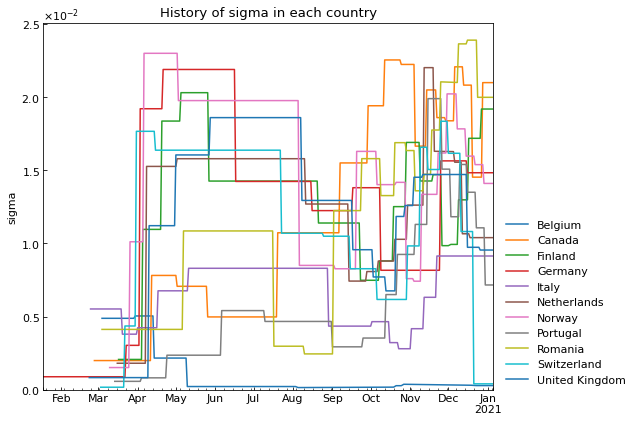

Country,Belgium,Canada,Finland,Germany,Italy,Netherlands,Norway,Portugal,Romania,Switzerland,United Kingdom
Date,,,,,,,,,,,
2021-01-01,0.000282,0.020982,0.019178,0.014824,0.009135,0.01039,0.014094,0.007156,0.019979,0.0004,0.009543
2021-01-02,0.000282,0.020982,0.019178,0.014824,0.009135,0.01039,0.014094,0.007156,0.019979,0.0004,0.009543
2021-01-03,0.000282,0.020982,0.019178,0.014824,0.009135,0.01039,0.014094,0.007156,0.019979,0.0004,0.009543
2021-01-04,0.000282,0.020982,0.019178,0.014824,0.009135,0.01039,0.014094,0.007156,0.019979,0.0004,0.009543
2021-01-05,0.000282,0.020982,0.019178,0.014824,0.009135,0.01039,0.014094,0.007156,0.019979,0.0004,0.009543


In [16]:
analyser.history("sigma", roll_window=None).tail()

### $\kappa$: Mortality rate of infected cases $\mathrm{[-]}$

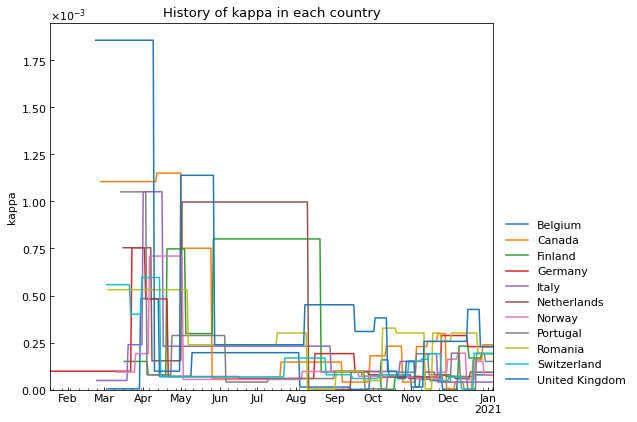

Country,Belgium,Canada,Finland,Germany,Italy,Netherlands,Norway,Portugal,Romania,Switzerland,United Kingdom
Date,,,,,,,,,,,
2021-01-01,0.000079,0.000239,0.000191,0.000229,0.000041,0.000093,0.000079,0.00015,0.000192,0.000193,0.000228
2021-01-02,0.000079,0.000239,0.000191,0.000229,0.000041,0.000093,0.000079,0.00015,0.000192,0.000193,0.000228
2021-01-03,0.000079,0.000239,0.000191,0.000229,0.000041,0.000093,0.000079,0.00015,0.000192,0.000193,0.000228
2021-01-04,0.000079,0.000239,0.000191,0.000229,0.000041,0.000093,0.000079,0.00015,0.000192,0.000193,0.000228
2021-01-05,0.000079,0.000239,0.000191,0.000229,0.000041,0.000093,0.000079,0.00015,0.000192,0.000193,0.000228


In [17]:
analyser.history("kappa", roll_window=None).tail()

### $\theta$: Mortality rate of S$^\ast$ cases $\mathrm{[-]}$

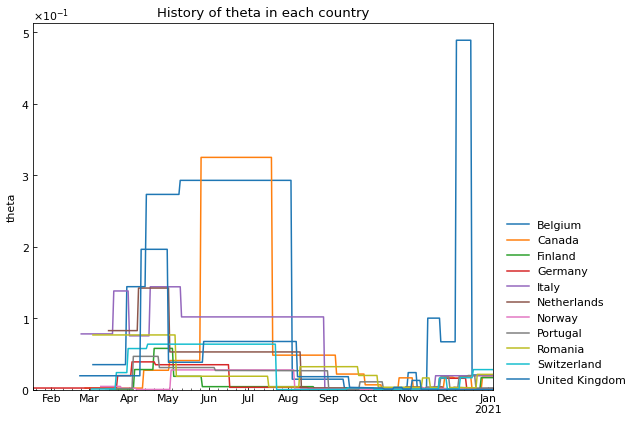

Country,Belgium,Canada,Finland,Germany,Italy,Netherlands,Norway,Portugal,Romania,Switzerland,United Kingdom
Date,,,,,,,,,,,
2021-01-01,0.020567,0.017544,0.016837,0.000183,0.019505,0.001799,0.000498,0.002419,0.021406,0.028095,0.000122
2021-01-02,0.020567,0.017544,0.016837,0.000183,0.019505,0.001799,0.000498,0.002419,0.021406,0.028095,0.000122
2021-01-03,0.020567,0.017544,0.016837,0.000183,0.019505,0.001799,0.000498,0.002419,0.021406,0.028095,0.000122
2021-01-04,0.020567,0.017544,0.016837,0.000183,0.019505,0.001799,0.000498,0.002419,0.021406,0.028095,0.000122
2021-01-05,0.020567,0.017544,0.016837,0.000183,0.019505,0.001799,0.000498,0.002419,0.021406,0.028095,0.000122


In [18]:
analyser.history("theta", roll_window=None).tail()

## (Experimental): Relationship of OxCGRT index and parameter values
Government responses will impact on parameter values of ODE models about 14 days later. Here, we will investigate on the relationship of [stringency index (from OxCGRT)](https://github.com/OxCGRT/covid-policy-tracker/blob/master/documentation/index_methodology.md) and reproduction number/model parameters.


In [19]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd

In [20]:
df = analyser.track()
param_cols = ["Rt", *cs.SIRF.PARAMETERS]
oxcgrt_cols = oxcgrt_data.OXCGRT_VARS[:]
cols = param_cols + oxcgrt_cols
delay = 14

for col in param_cols:
    df[col] = pd.to_numeric(df[col], errors="coerce")
    df[col] = df.groupby("Country")[col].shift(0 - delay)

df = df.dropna(how="any")
df = df.loc[:, ["Date", "Country", *cols]]
track_df = df.copy()
track_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41578 entries, 0 to 41717
Data columns (total 19 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Date                                 41578 non-null  datetime64[ns]
 1   Country                              41578 non-null  object        
 2   Rt                                   41578 non-null  float64       
 3   theta                                41578 non-null  float64       
 4   kappa                                41578 non-null  float64       
 5   rho                                  41578 non-null  float64       
 6   sigma                                41578 non-null  float64       
 7   School_closing                       41578 non-null  int64         
 8   Workplace_closing                    41578 non-null  int64         
 9   Cancel_events                        41578 non-null  int64         
 10  Gatherings

In [21]:
# Correlation
df = track_df.copy()
df.corr().style.background_gradient(axis=None)

,Rt,theta,kappa,rho,sigma,School_closing,Workplace_closing,Cancel_events,Gatherings_restrictions,Transport_closing,Stay_home_restrictions,Internal_movement_restrictions,International_movement_restrictions,Information_campaigns,Testing_policy,Contact_tracing,Stringency_index
Rt,1.000000,-0.153577,0.298916,0.597681,-0.490896,-0.290304,-0.309994,-0.163716,-0.300343,-0.189970,-0.221845,-0.227569,-0.334305,-0.250631,-0.351479,-0.212551,-0.314092
theta,-0.153577,1.000000,-0.049959,-0.303119,-0.103217,0.344642,0.249255,-0.067569,0.071306,0.105243,0.224461,0.106183,0.067776,0.090154,-0.057007,-0.070440,0.248955
kappa,0.298916,-0.049959,1.000000,0.499255,-0.197807,-0.042836,0.040965,-0.179633,-0.150746,0.056984,-0.049072,-0.073910,-0.384949,-0.049724,-0.355481,-0.330989,-0.035130
rho,0.597681,-0.303119,0.499255,1.000000,-0.269272,-0.255991,-0.244708,-0.266649,-0.275491,-0.255070,-0.230872,-0.263401,-0.362341,-0.117968,-0.259346,-0.177520,-0.193817
sigma,-0.490896,-0.103217,-0.197807,-0.269272,1.000000,0.248585,0.186051,0.144590,0.313996,-0.077014,-0.040218,0.020713,0.173237,0.231113,0.241321,0.171761,0.198444
School_closing,-0.290304,0.344642,-0.042836,-0.255991,0.248585,1.000000,0.371149,0.105732,0.134850,0.074296,0.349580,0.197585,0.234978,0.307170,0.147365,0.079281,0.439459
Workplace_closing,-0.309994,0.249255,0.040965,-0.244708,0.186051,0.371149,1.000000,0.278791,0.716028,0.259095,0.613168,0.381377,0.250215,0.382356,0.084964,-0.146832,0.785238
Cancel_events,-0.163716,-0.067569,-0.179633,-0.266649,0.144590,0.105732,0.278791,1.000000,0.374204,0.359205,0.358948,0.668867,0.064897,0.355034,-0.029387,0.103364,0.313610
Gatherings_restrictions,-0.300343,0.071306,-0.150746,-0.275491,0.313996,0.134850,0.716028,0.374204,1.000000,0.210024,0.471162,0.408034,0.234356,0.372314,0.164492,-0.046210,0.754995
Transport_closing,-0.189970,0.105243,0.056984,-0.255070,-0.077014,0.074296,0.259095,0.359205,0.210024,1.000000,0.293507,0.608203,-0.174485,0.129649,-0.124262,-0.009909,0.302318


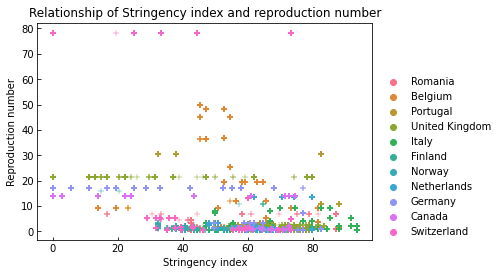

In [22]:
# Scatter plot of Stringency index and Rt
df = track_df.copy()
sns.scatterplot(data=df, x="Stringency_index", y="Rt", hue="Country", legend="brief", marker="+")
bbox_to_anchor=(1.02, 0)
bbox_loc="lower left"
plt.legend(bbox_to_anchor=bbox_to_anchor, loc=bbox_loc, borderaxespad=0)
plt.title("Relationship of Stringency index and reproduction number")
plt.ylabel("Reproduction number")
plt.xlabel("Stringency index")
plt.show()